In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [127]:
data = pd.read_csv(r"C:\Users\honzi\OneDrive\Desktop\py_osobni\ZDA\modified_chicago_crashes")


In [96]:
# Assign days back to numbers as in the USA 
day_mapping = {
    "Monday": 2,
    "Tuesday": 3,
    "Wednesday": 4,
    "Thursday": 5,
    "Friday": 6,
    "Saturday": 7,
    "Sunday": 1
}

data["CRASH_DAY_OF_WEEK"] = data["CRASH_DAY_OF_WEEK"].map(day_mapping)

# Assign months back to numbers
month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

data["CRASH_MONTH"] = data["CRASH_MONTH"].map(month_mapping)

C:\Users\honzi\AppData\Local\Temp\ipykernel_29784\3533013319.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data["CRASH_DATE"] = pd.to_datetime(data["CRASH_DATE"], dayfirst=True)


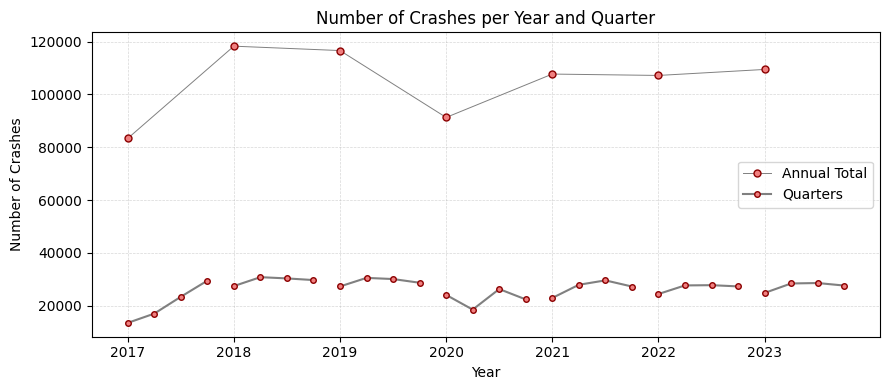

In [128]:
# Convert to datetime
data["CRASH_DATE"] = pd.to_datetime(data["CRASH_DATE"], dayfirst=True)

# Filter out data for the year 2024 and above
data = data[data["CRASH_DATE"].dt.year <= 2023]

# Extract the year and quarter from the date
data["CRASH_YEAR"] = data["CRASH_DATE"].dt.year
data["CRASH_QUARTER"] = data["CRASH_DATE"].dt.to_period("Q")

# Group by year and quarter and count occurrences
quarterly_counts = data.groupby("CRASH_QUARTER").size().reset_index(name='Counts')

# Extract the year from the period
quarterly_counts["Year"] = quarterly_counts["CRASH_QUARTER"].dt.year
quarterly_counts["Quarter"] = quarterly_counts["CRASH_QUARTER"].dt.quarter

# Plot the time series
plt.figure(figsize=(9, 4))

# Plot annual totals
yearly_counts = data.groupby("CRASH_YEAR").size().reset_index(name='Counts')
plt.plot(yearly_counts["CRASH_YEAR"], yearly_counts["Counts"], marker='o',linewidth = 0.7, linestyle='-', color='grey', markersize=5, markerfacecolor='lightcoral', markeredgecolor='darkred', label='Annual Total')

# Plot quarterly counts
for year in quarterly_counts["Year"].unique():
    yearly_data = quarterly_counts[quarterly_counts["Year"] == year]
    plt.plot(yearly_data["Year"] + (yearly_data["Quarter"] - 1) / 4, yearly_data["Counts"], 'o-', color='grey', markersize=4, markerfacecolor='lightcoral', markeredgecolor='darkred', label='Quarters' if year == quarterly_counts["Year"].unique()[0] else "")

plt.title('Number of Crashes per Year and Quarter')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.xticks(yearly_counts["CRASH_YEAR"].unique())
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

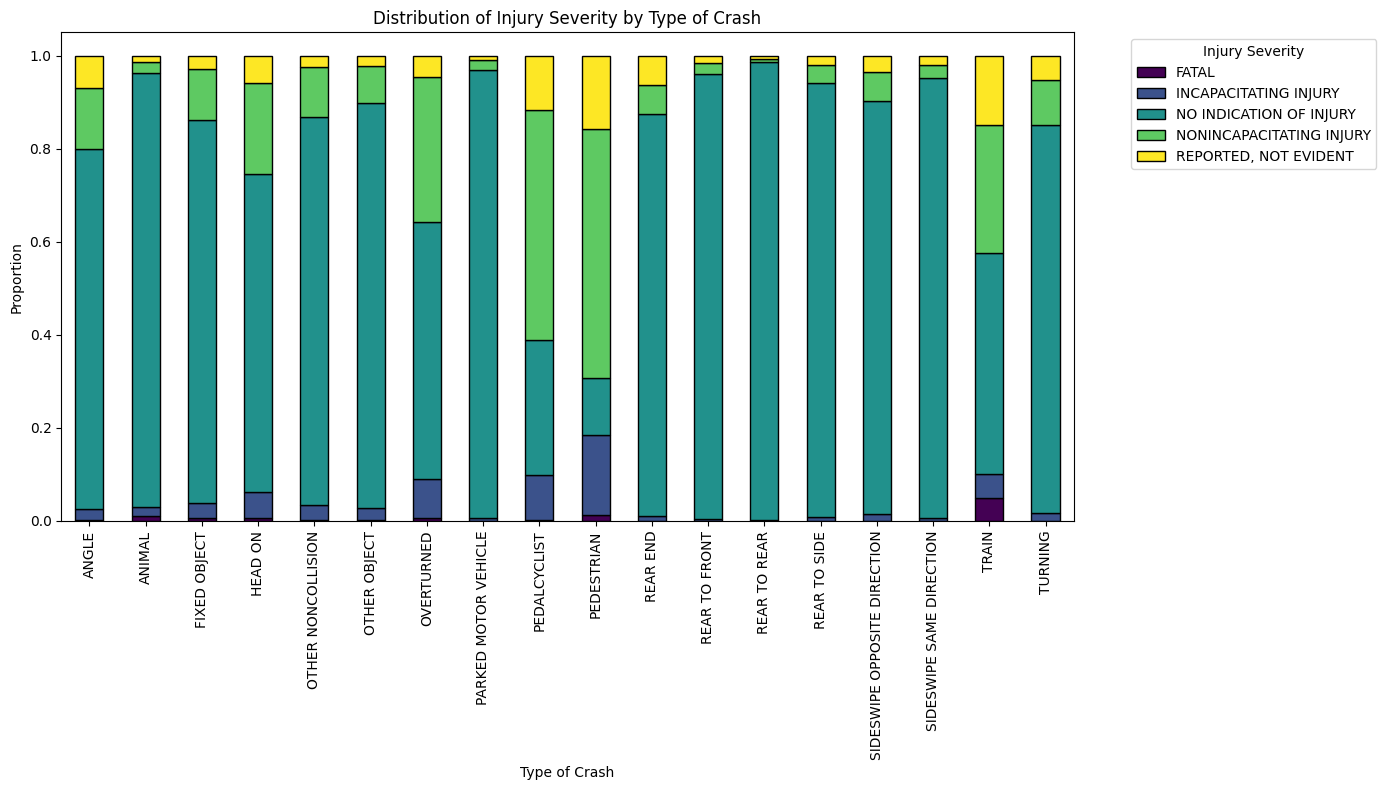

MOST_SEVERE_INJURY            FATAL  INCAPACITATING INJURY  \
FIRST_CRASH_TYPE                                             
ANGLE                            95                   2048   
ANIMAL                            6                     10   
FIXED OBJECT                    204                   1141   
HEAD ON                          41                    348   
OTHER NONCOLLISION                4                     70   
OTHER OBJECT                     17                    184   
OVERTURNED                        3                     38   
PARKED MOTOR VEHICLE             97                    896   
PEDALCYCLIST                     32                   1110   
PEDESTRIAN                      220                   3046   
REAR END                         38                   1590   
REAR TO FRONT                     2                     32   
REAR TO REAR                      0                      4   
REAR TO SIDE                      0                     39   
SIDESWIP

In [129]:

# Filter out empty rows
data_filtered = data.dropna(subset=['MOST_SEVERE_INJURY', 'FIRST_CRASH_TYPE'])

# Create a crosstab to count the occurrences
injury_crash_crosstab = pd.crosstab(data_filtered['FIRST_CRASH_TYPE'], data_filtered['MOST_SEVERE_INJURY'])

# Normalize the crosstab
injury_crash_crosstab_norm = injury_crash_crosstab.div(injury_crash_crosstab.sum(axis=1), axis=0)

# Plot the bar chart
plt.figure(figsize=(14, 8))
injury_crash_crosstab_norm.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black', figsize=(14, 8))

plt.title('Distribution of Injury Severity by Type of Crash')
plt.xlabel('Type of Crash')
plt.ylabel('Proportion')
plt.legend(title='Injury Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(injury_crash_crosstab)

C:\Users\honzi\AppData\Local\Temp\ipykernel_29784\4238267981.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cause_counts.values, y=cause_counts.index, palette='viridis')


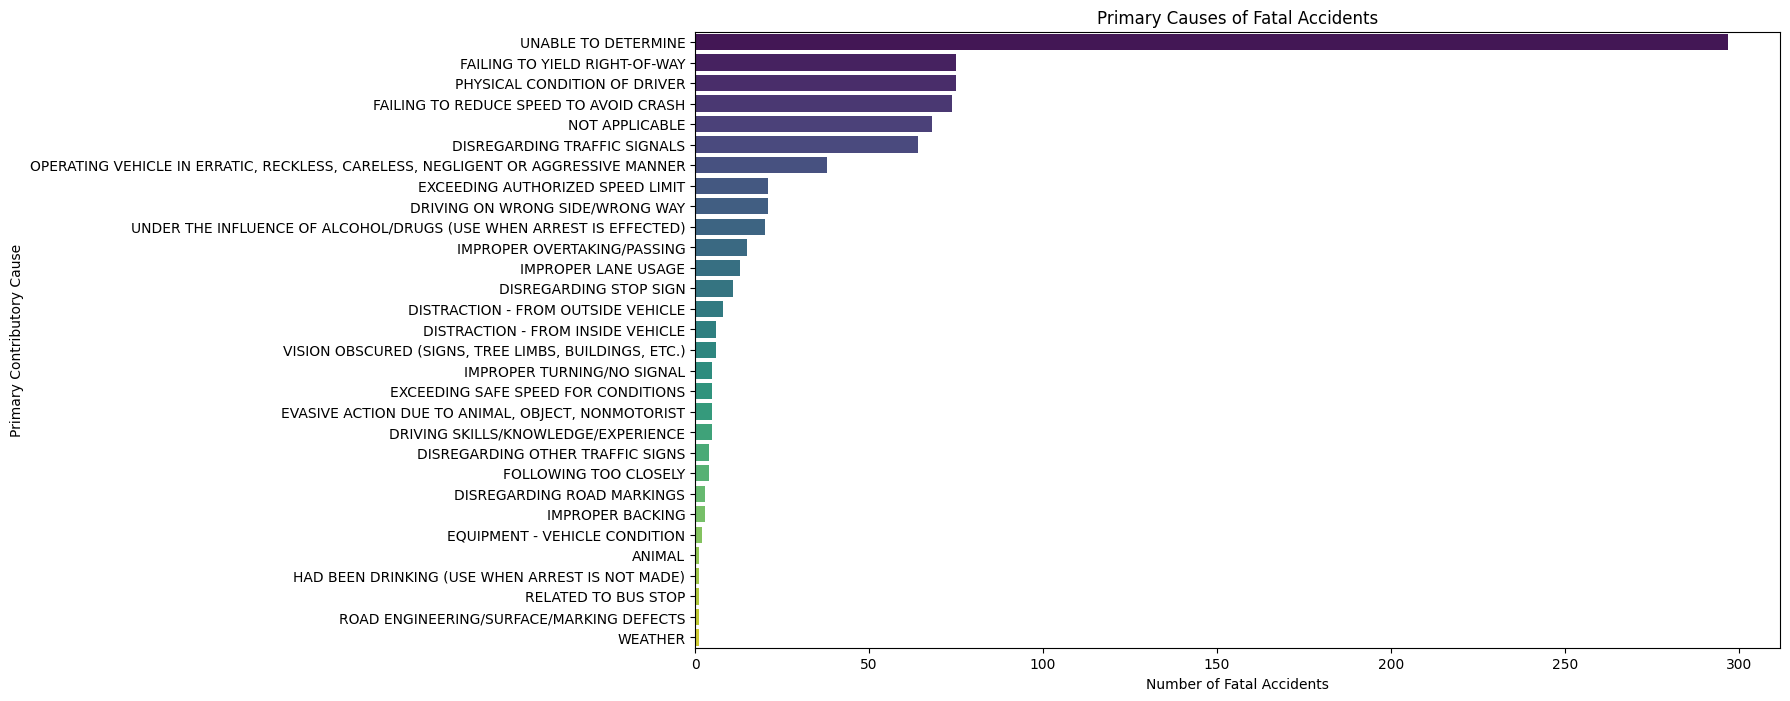

In [130]:

# Filter for fatal crashes
fatal_crashes = data[data['MOST_SEVERE_INJURY'] == 'FATAL']

# Drop rows with NaN values in primary contributory cause
fatal_crashes_cleaned = fatal_crashes.dropna(subset=['PRIM_CONTRIBUTORY_CAUSE'])

# Count the occurrences of each primary contributory cause
cause_counts = fatal_crashes_cleaned['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

# Plot the primary causes of fatal accidents
plt.figure(figsize=(14, 8))
sns.barplot(x=cause_counts.values, y=cause_counts.index, palette='viridis')
plt.title('Primary Causes of Fatal Accidents')
plt.xlabel('Number of Fatal Accidents')
plt.ylabel('Primary Contributory Cause')
plt.show()

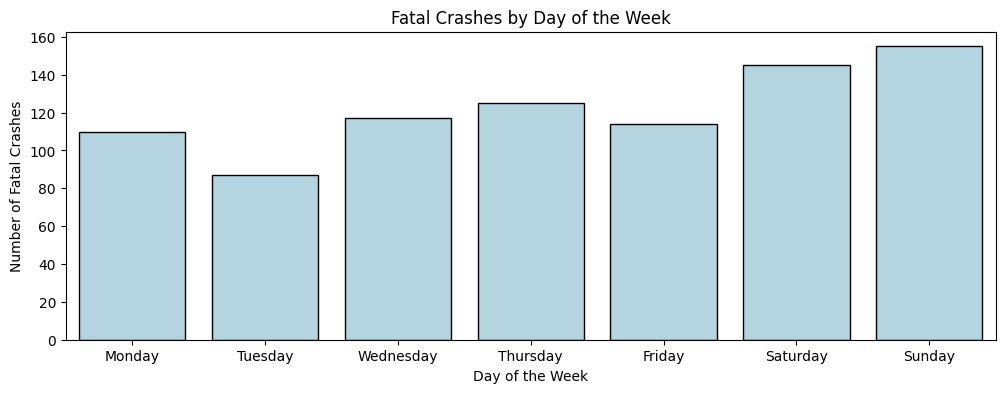

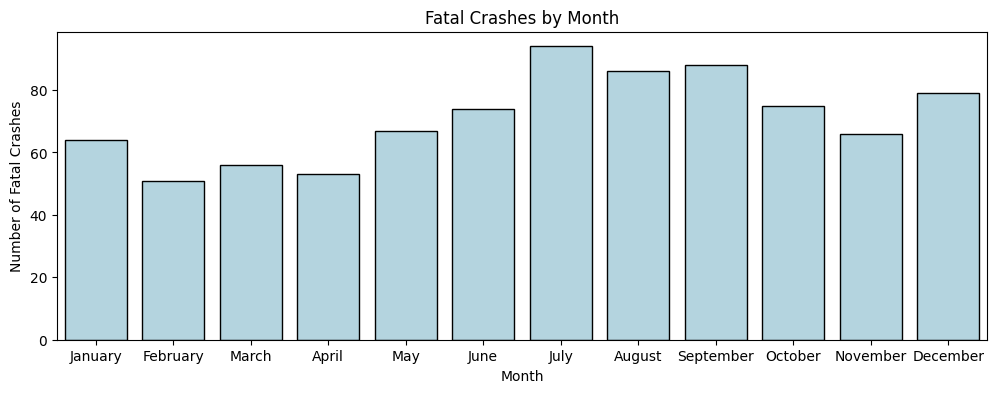

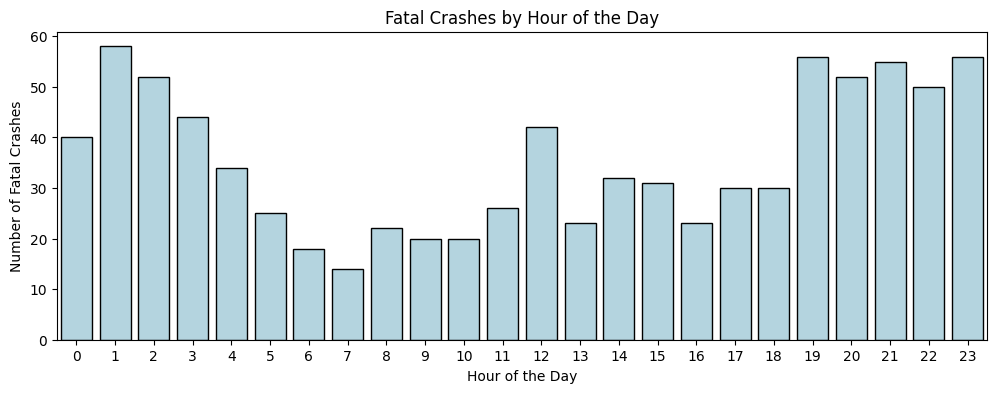

In [131]:
# Filter data for fatal crashes
fatal_crashes = data[data['MOST_SEVERE_INJURY'] == 'FATAL']

# Drop rows with empty values in latitude and longitude
fatal_crashes = fatal_crashes.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Extract features
fatal_crashes['CRASH_DAY_OF_WEEK'] = fatal_crashes['CRASH_DATE'].dt.dayofweek
fatal_crashes['CRASH_MONTH'] = fatal_crashes['CRASH_DATE'].dt.month

# Plot for days of the week
plt.figure(figsize=(12, 4))
day_counts = fatal_crashes['CRASH_DAY_OF_WEEK'].value_counts().sort_index()
sns.countplot(x='CRASH_DAY_OF_WEEK', data=fatal_crashes, color='lightblue', edgecolor='black')
plt.title('Fatal Crashes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fatal Crashes')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

# Plot for months
plt.figure(figsize=(12, 4))
month_counts = fatal_crashes['CRASH_MONTH'].value_counts().sort_index()
sns.countplot(x='CRASH_MONTH', data=fatal_crashes, color='lightblue', edgecolor='black')
plt.title('Fatal Crashes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Fatal Crashes')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

# Plot for hours of the day
plt.figure(figsize=(12, 4))
hour_counts = fatal_crashes['CRASH_HOUR'].value_counts().sort_index()
sns.countplot(x='CRASH_HOUR', data=fatal_crashes, color='lightblue', edgecolor='black')
plt.title('Fatal Crashes by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fatal Crashes')
plt.xticks(ticks=range(24))
plt.show()

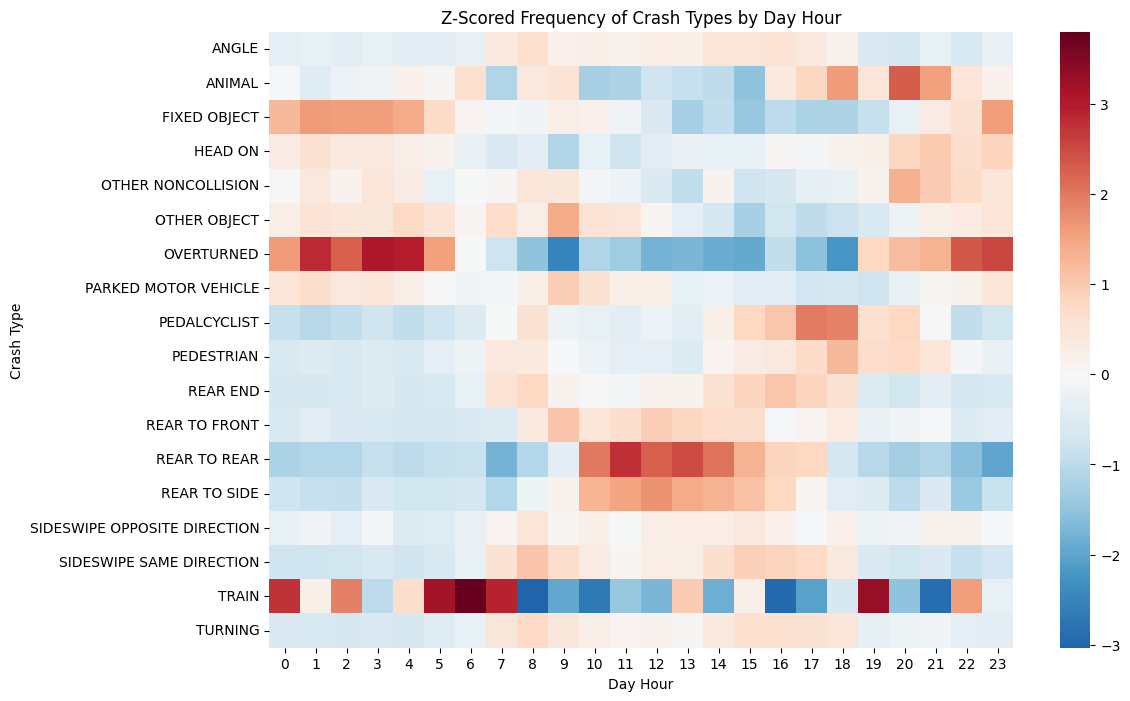

In [132]:
# Create a pivot table and fill empty cells
pivot_table = data.pivot_table(index='FIRST_CRASH_TYPE', columns='CRASH_HOUR', aggfunc='size', fill_value=0)

# Calculate row-wise normalized pivot table
row_normalized_pivot = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Calculate z-score for each cell
z_scored_pivot = (row_normalized_pivot - row_normalized_pivot.mean()) / row_normalized_pivot.std()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(z_scored_pivot, cmap='RdBu_r', center=0, annot=False)
plt.title('Z-Scored Frequency of Crash Types by Day Hour')
plt.xlabel('Day Hour')
plt.ylabel('Crash Type')
plt.show()


In [97]:
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import DBSCAN

# Filter data for fatal accidents
fatal_accidents = data[data['MOST_SEVERE_INJURY'] == 'FATAL']

# Drop empty rows of latitudes and longitudes for clustering
coords = fatal_accidents[['LATITUDE', 'LONGITUDE']].dropna()

# Apply DBSCAN clustering
db = DBSCAN(eps=0.01, min_samples=10).fit(coords)
labels = db.labels_

# Add cluster labels to the dataframe
fatal_accidents['CLUSTER'] = labels

# Create a base map centered around the general area of interest
center_lat = coords['LATITUDE'].mean()
center_lon = coords['LONGITUDE'].mean()
base_map = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(base_map)

# Define a color palette for the clusters
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
colors = sns.color_palette('hsv', num_clusters).as_hex()

# Add points to the marker cluster with different colors for each cluster
for _, row in fatal_accidents.iterrows():
    cluster_color = colors[row['CLUSTER']] if row['CLUSTER'] != -1 else '#000000'
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=5,
        color=cluster_color,
        fill=True,
        fill_color=cluster_color,
        fill_opacity=0.6,
        popup=f'Cluster: {row["CLUSTER"]}'
    ).add_to(marker_cluster)

# Save the map to an HTML file
base_map.save('fatal_accidents_map.html')

# Display the map
display(base_map)

C:\Users\honzi\AppData\Local\Temp\ipykernel_29784\931892922.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatal_accidents['CLUSTER'] = labels


C:\Users\honzi\AppData\Local\Temp\ipykernel_29784\3816974492.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatal_accidents['CLUSTER'] = labels


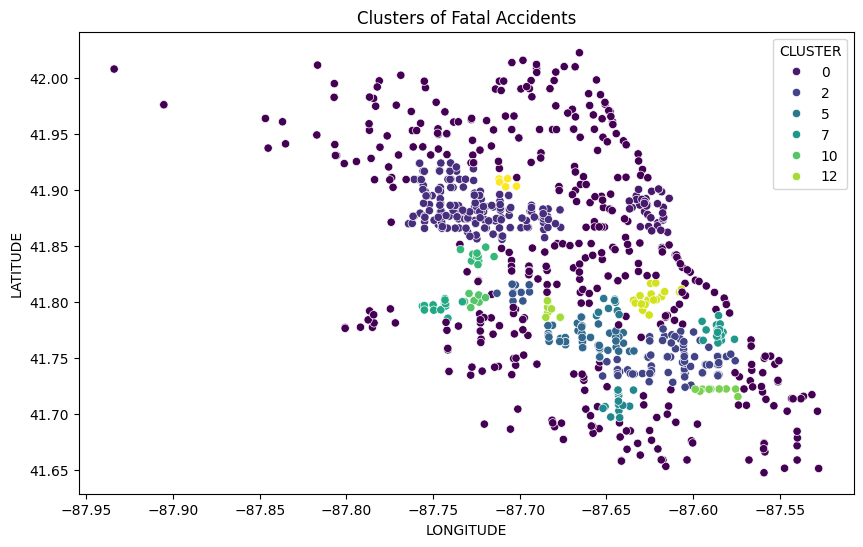

Silhouette Score: 0.25223409913331346


In [133]:
# Extract fatal accidents
fatal_accidents = data[data['MOST_SEVERE_INJURY'] == 'FATAL']

# Extract latitude and longitude for clustering
coords = fatal_accidents[['LATITUDE', 'LONGITUDE']].dropna()

# Apply DBSCAN clustering
db = DBSCAN(eps=0.01, min_samples=9).fit(coords)
labels = db.labels_

# Add cluster labels to the dataframe
fatal_accidents['CLUSTER'] = labels

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CLUSTER', data=fatal_accidents, palette='viridis')
plt.title('Clusters of Fatal Accidents')
plt.show()

from sklearn.metrics import silhouette_score

# Filter out noise points (-1 label)
clustered_coords = coords[labels != -1]
cluster_labels = labels[labels != -1]

# Compute silhouette score
silhouette_avg = silhouette_score(clustered_coords, cluster_labels)
print("Silhouette Score:", silhouette_avg)

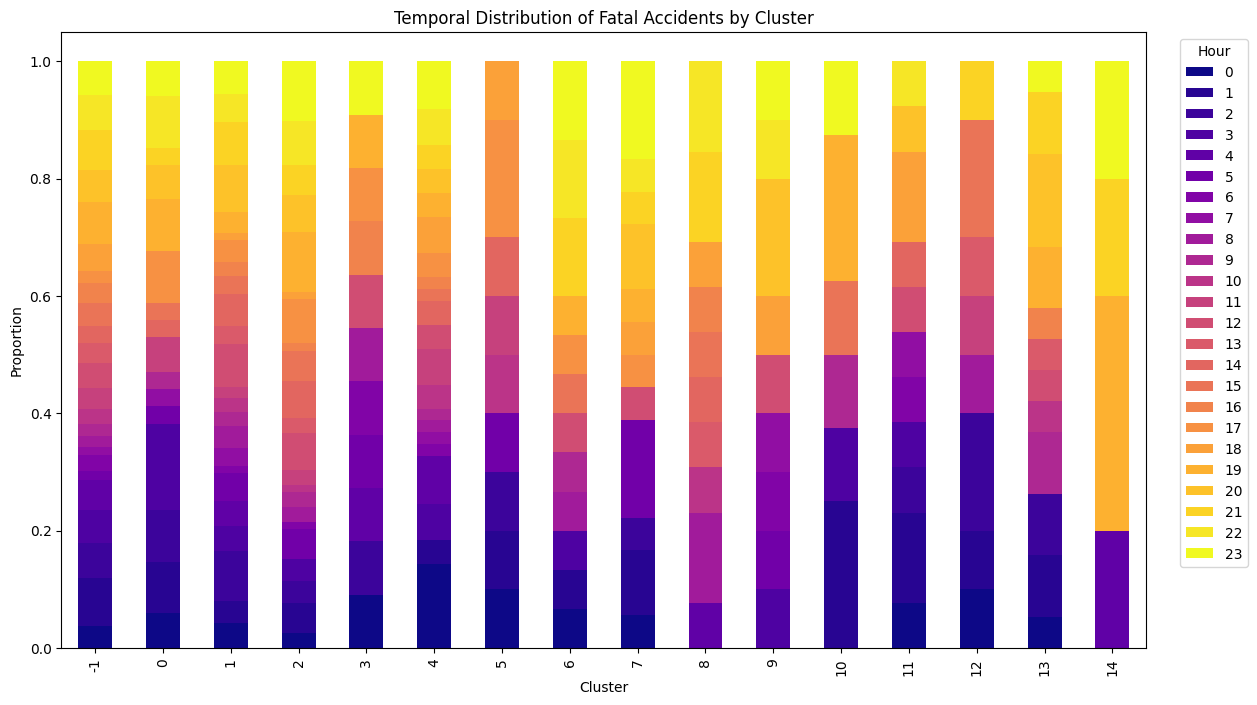

In [134]:
# Analyze the time of day for each cluster
cluster_times = fatal_accidents.groupby('CLUSTER')['CRASH_HOUR'].value_counts(normalize=True).unstack()
cluster_times.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='plasma')
plt.title('Temporal Distribution of Fatal Accidents by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Hour', loc='upper right', bbox_to_anchor=(1.1, 1))
plt.show()

C:\Users\honzi\AppData\Local\Temp\ipykernel_29784\74334243.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


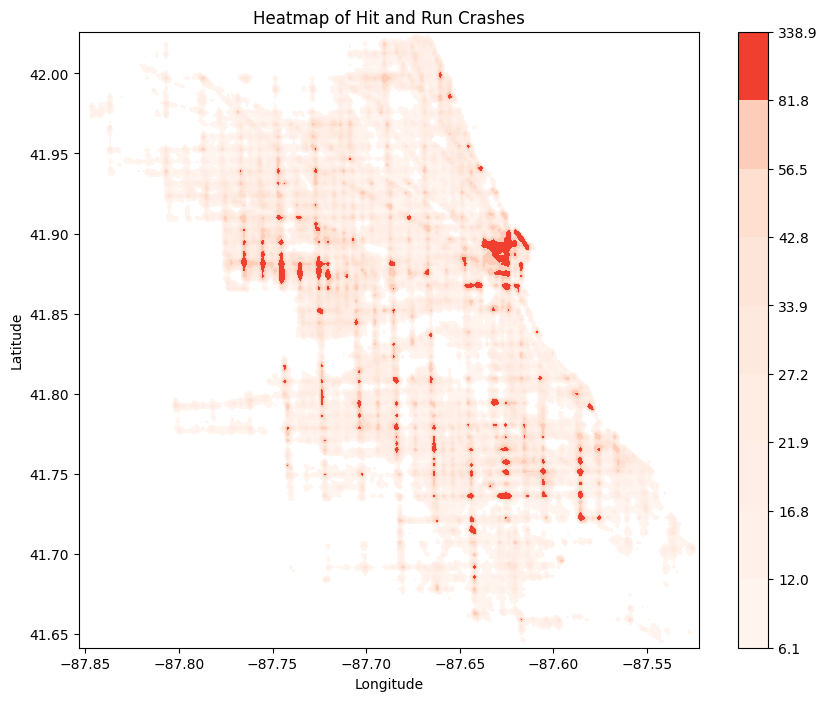

In [135]:
# Filter hit and run accidents
hit_and_run = data[data['HIT_AND_RUN_I'] == 'Y']

# Drop empty rows in longitudes and latitudes 
hit_and_run = hit_and_run.dropna(subset=['LONGITUDE', 'LATITUDE'])

# Filter out data points outside 1.5 times the interquartile range
Q1 = hit_and_run[['LONGITUDE', 'LATITUDE']].quantile(0.25)
Q3 = hit_and_run[['LONGITUDE', 'LATITUDE']].quantile(0.75)
IQR = Q3 - Q1

filtered_hit_and_run = hit_and_run[~((hit_and_run[['LONGITUDE', 'LATITUDE']] < (Q1 - 1.5 * IQR)) | (hit_and_run[['LONGITUDE', 'LATITUDE']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.kdeplot(
    x=filtered_hit_and_run['LONGITUDE'], 
    y=filtered_hit_and_run['LATITUDE'], 
    cmap='Reds', 
    shade=True, 
    bw_adjust=.1,
    cbar=True,
)
plt.title('Heatmap of Hit and Run Crashes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

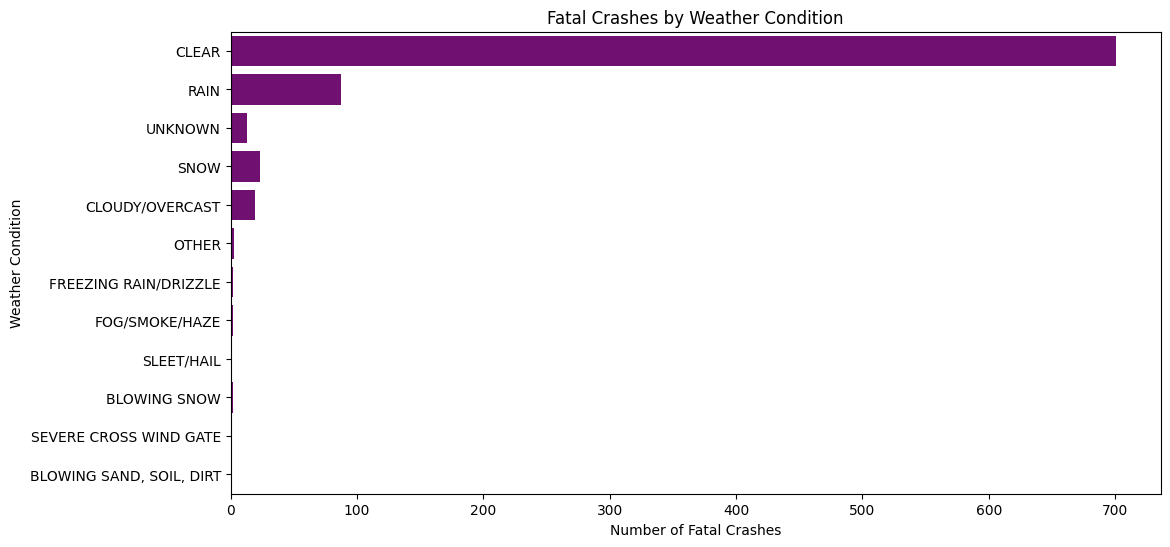

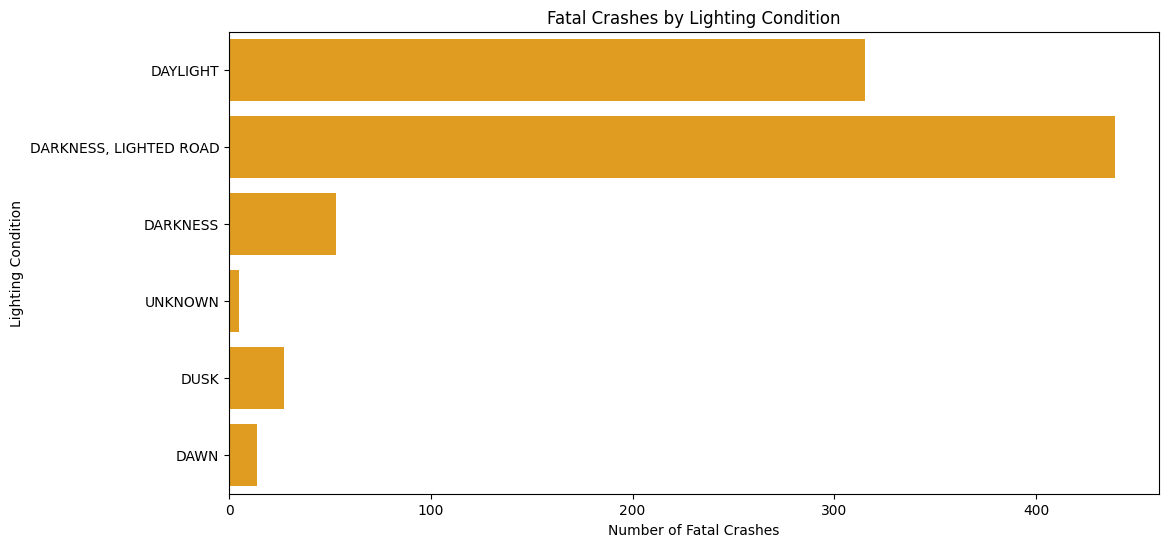

In [136]:
# Bar plot for weather conditions
plt.figure(figsize=(12, 6))
sns.countplot(y='WEATHER_CONDITION', data=fatal_crashes, color='Purple', order=data['WEATHER_CONDITION'].value_counts().index)
plt.title('Fatal Crashes by Weather Condition')
plt.xlabel('Number of Fatal Crashes')
plt.ylabel('Weather Condition')
plt.show()

# Bar plot for lighting conditions
plt.figure(figsize=(12, 6))
sns.countplot(y='LIGHTING_CONDITION', data=fatal_crashes, color='Orange', order=data['LIGHTING_CONDITION'].value_counts().index)
plt.title('Fatal Crashes by Lighting Condition')
plt.xlabel('Number of Fatal Crashes')
plt.ylabel('Lighting Condition')
plt.show()